In [2]:
!ls

Covid19.ipynb
Covid19.xlsx
CovidIndiaAnalysis_Source_covid19india_org.jpeg
Population.xlsx
README.md


In [96]:
x,y = '2020-02-04','2020-04-13'
(datetime.strptime(x,'%Y-%m-%d')-datetime.strptime(y,'%Y-%m-%d')).days

-69

In [109]:
from datetime import date,datetime
def get_dif(x,y):
    try:
        return (datetime.strptime(y,'%Y-%m-%d')-datetime.strptime(x,'%Y-%m-%d')).days
    except:
        return -100

In [113]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from matplotlib import pyplot as plt
data_df = pd.read_excel('Covid19.xlsx')
data_df['Updated'] = data_df['Updated On'].apply(lambda x: str(x)[:10])
all_days = list(sorted(data_df['Updated'].unique()))
data_df['Recency'] = data_df['Updated'].apply(lambda x: get_dif(all_days[-1],x))
data_df = data_df[data_df['Total Tested']>=0].sort_values(['State','Updated'])
data_df = data_df[['Updated On','Recency','State', 'Total Tested', 'Positive']]
population_df = pd.read_excel('Population.xlsx').rename(columns={'State or union territory':'State','Population (2020 estimates)':'Population'})
chart_df = data_df.merge(population_df,on='State',how='left')

In [114]:
chart_df['test_rate'] = chart_df.apply(lambda x: 1000*x['Total Tested']/x['Population'],axis=1)
chart_df['positive_rate'] = chart_df.apply(lambda x: 15000*x['Positive']/x['Total Tested'],axis=1)
chart_df.sample(28)

,Updated On,Recency,State,Total Tested,Positive,Population,test_rate,positive_rate
101,2020-04-11,-8,Himachal Pradesh,900.0,30.0,7663167,0.117445,500.000000
140,2020-04-03,-16,Kerala,9139.0,295.0,35122966,0.260200,484.188642
260,2020-04-09,-10,Uttar Pradesh,8402.0,410.0,237095024,0.035437,731.968579
15,2020-04-10,-9,Assam,2863.0,29.0,31169272,0.091853,151.938526
250,2020-04-14,-5,Tamil Nadu,19255.0,1204.0,82722262,0.232767,937.938198
165,2020-04-11,-8,Madhya Pradesh,8516.0,529.0,86044251,0.098972,931.775481
197,2020-04-06,-13,Nagaland,60.0,0.0,1980602,0.030294,0.000000
118,2020-04-18,-1,Jammu and Kashmir,6937.0,341.0,14849410,0.467157,737.350440
137,2020-02-04,-75,Kerala,9744.0,306.0,35122966,0.277425,471.059113
52,2020-04-14,-5,Chhattisgarh,4812.0,33.0,25540196,0.188409,102.867830


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


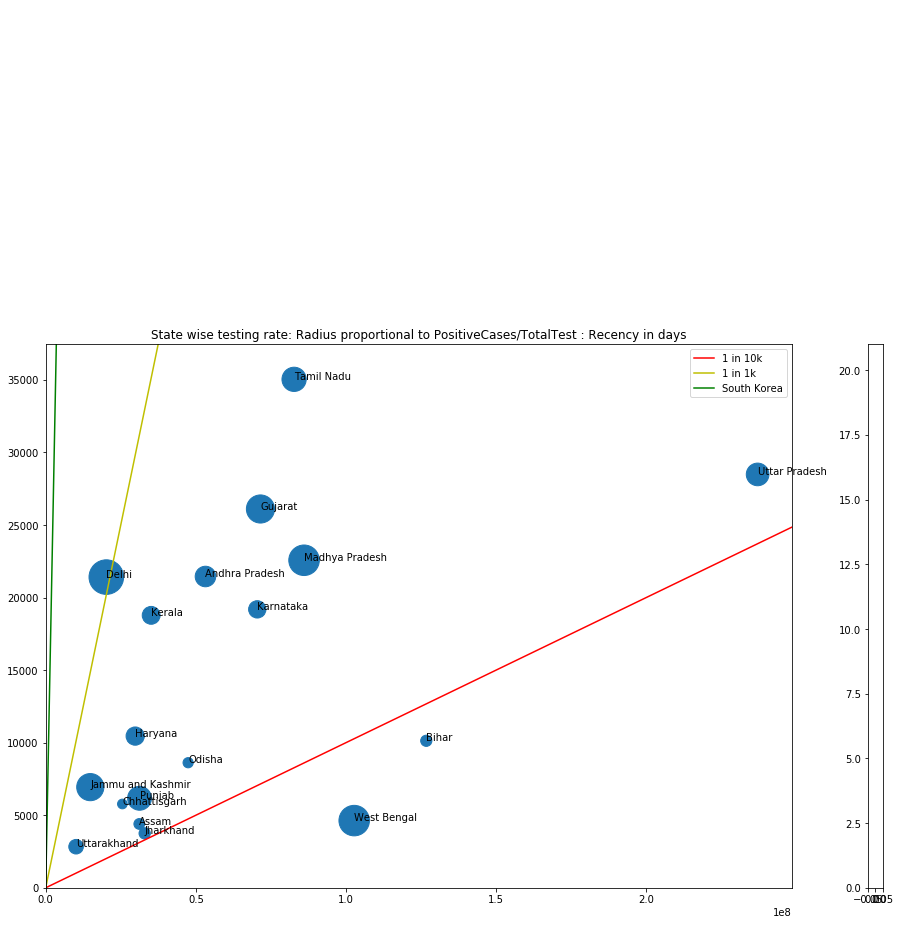

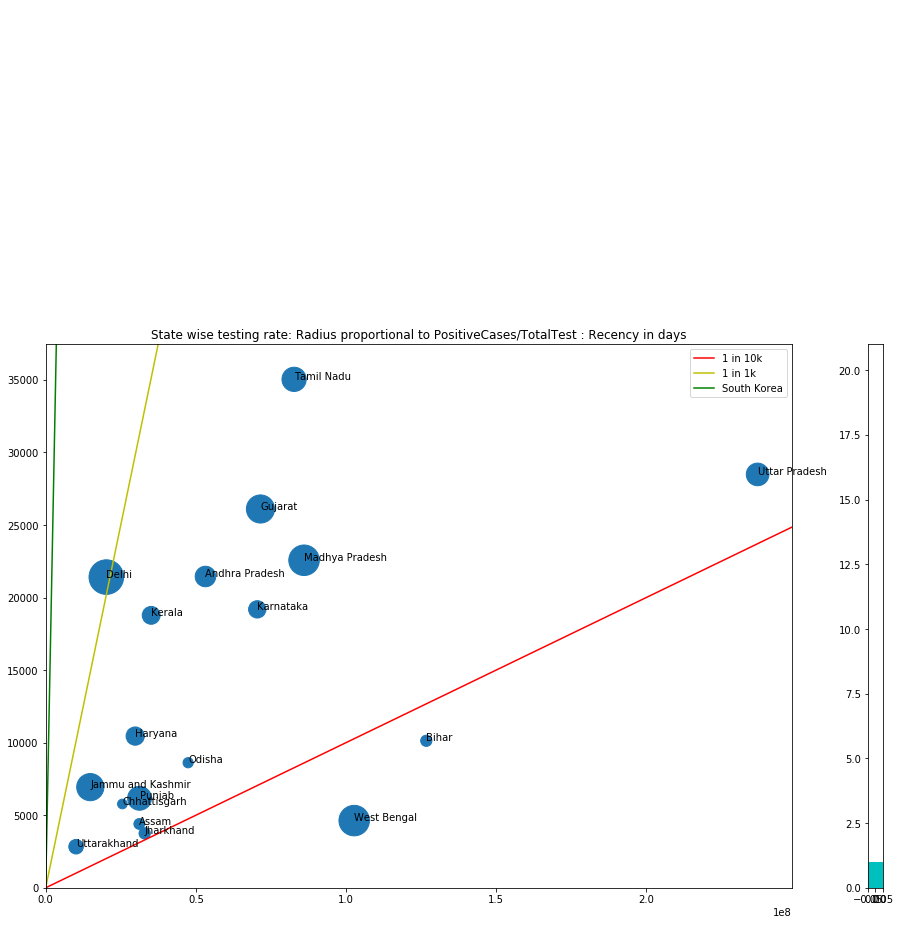

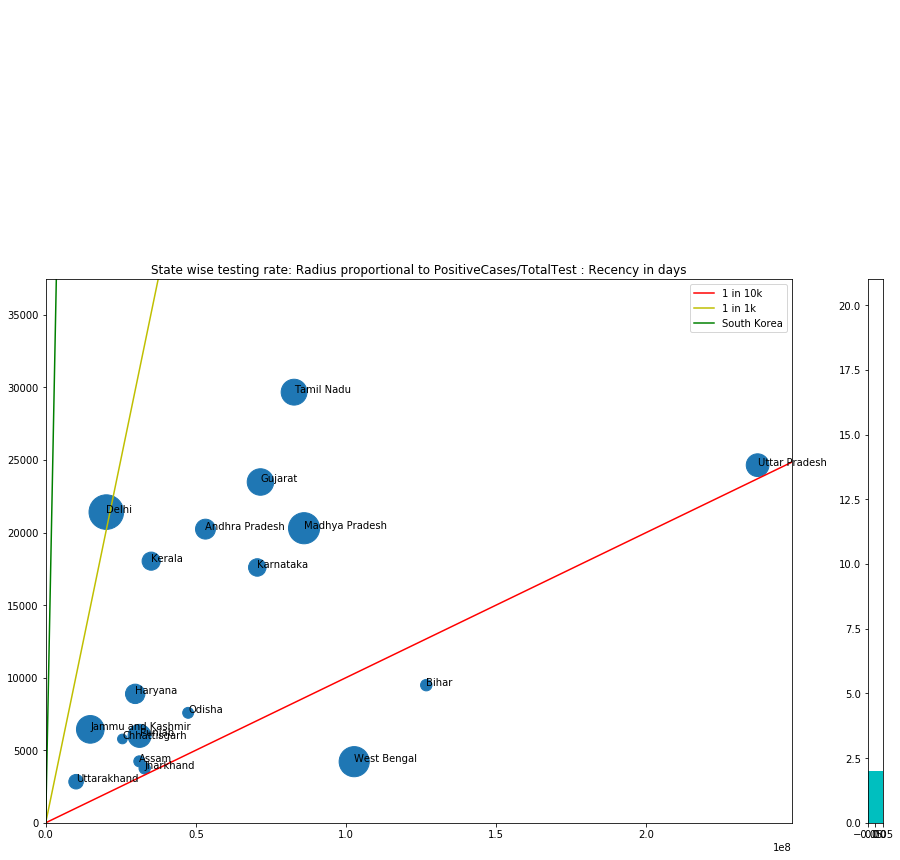

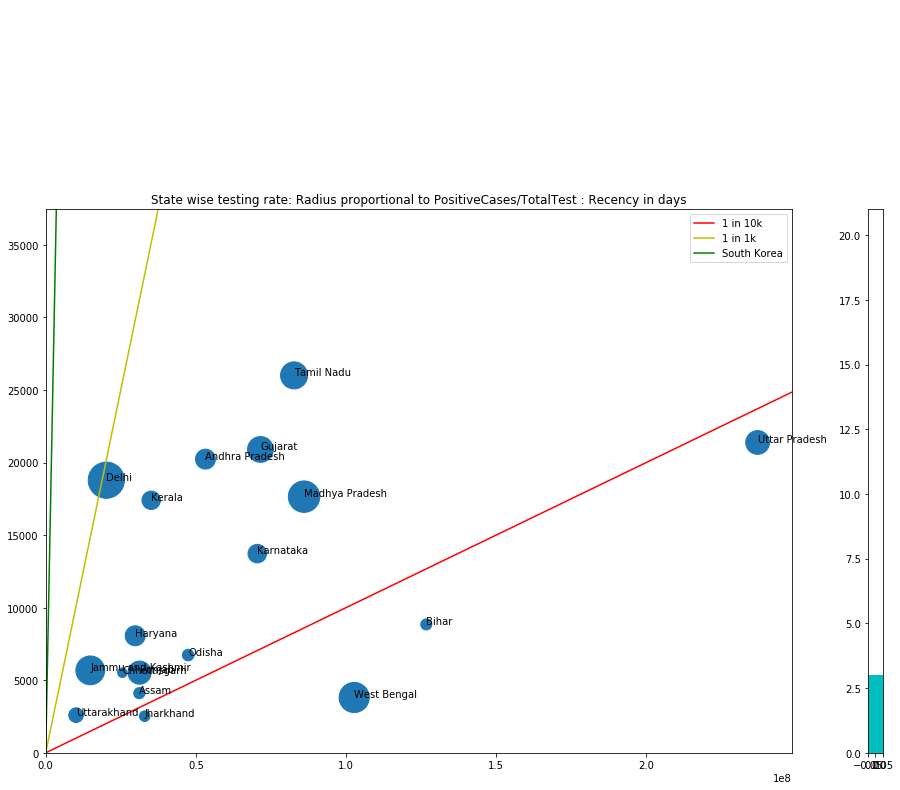

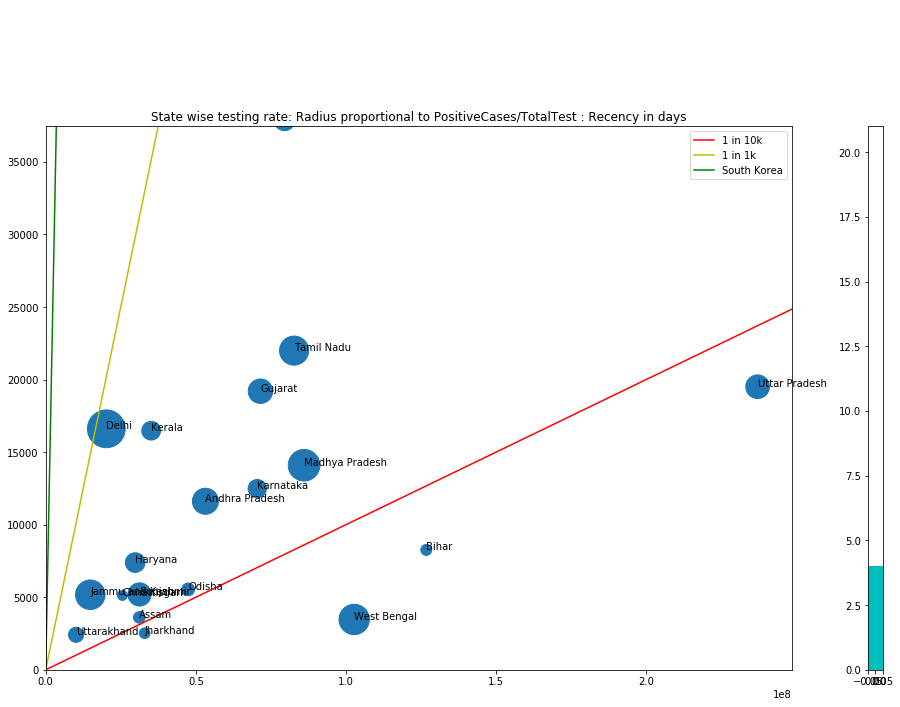

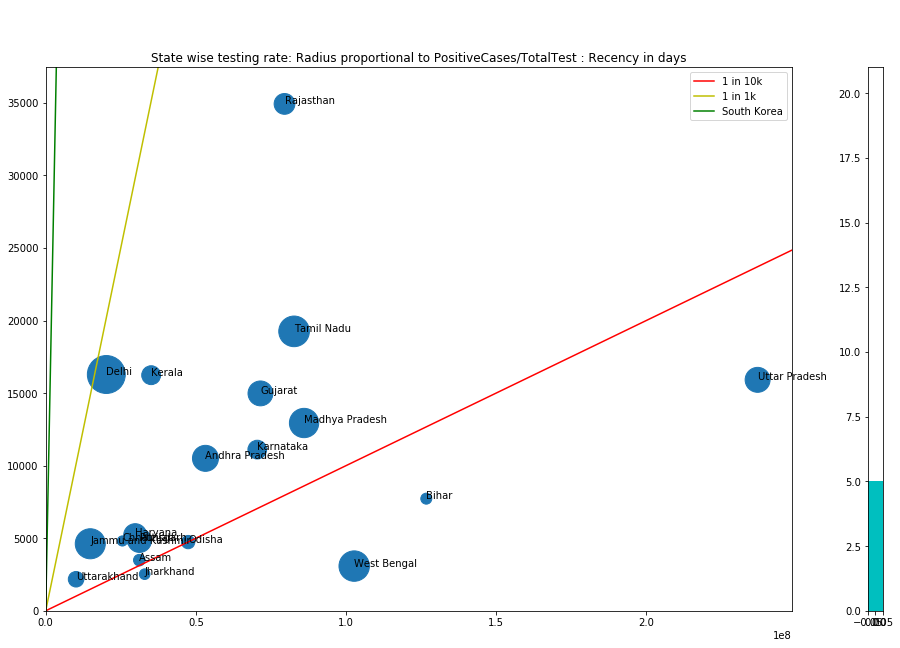

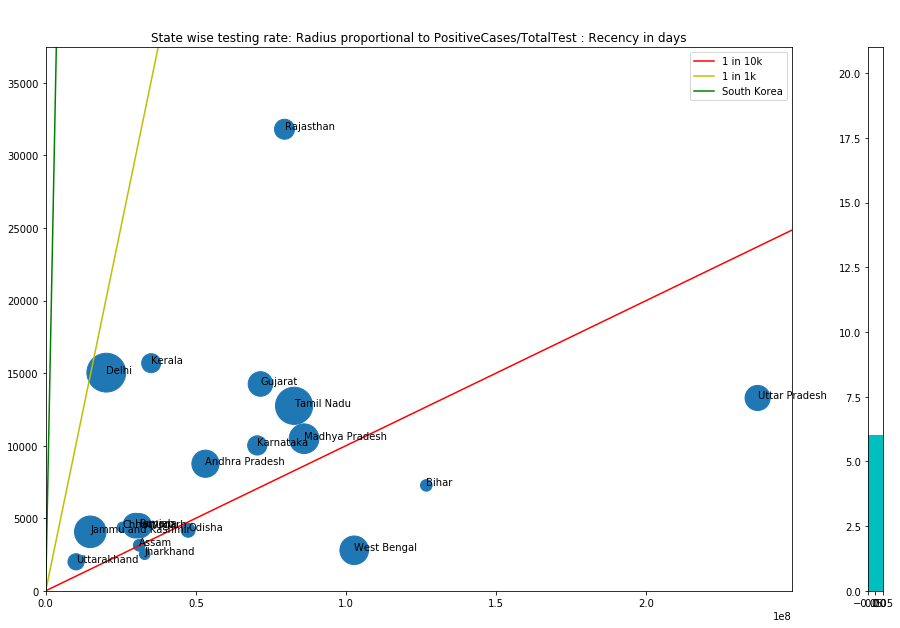

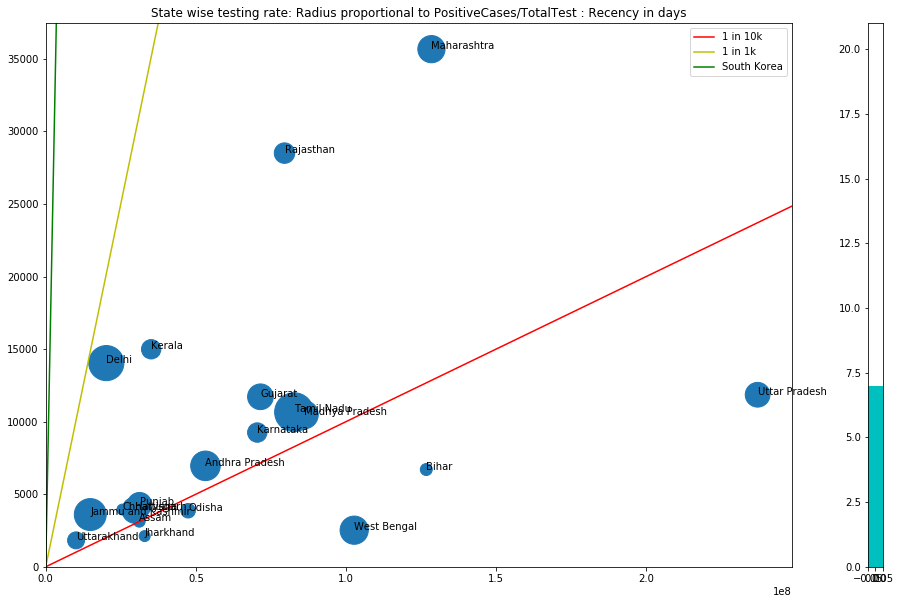

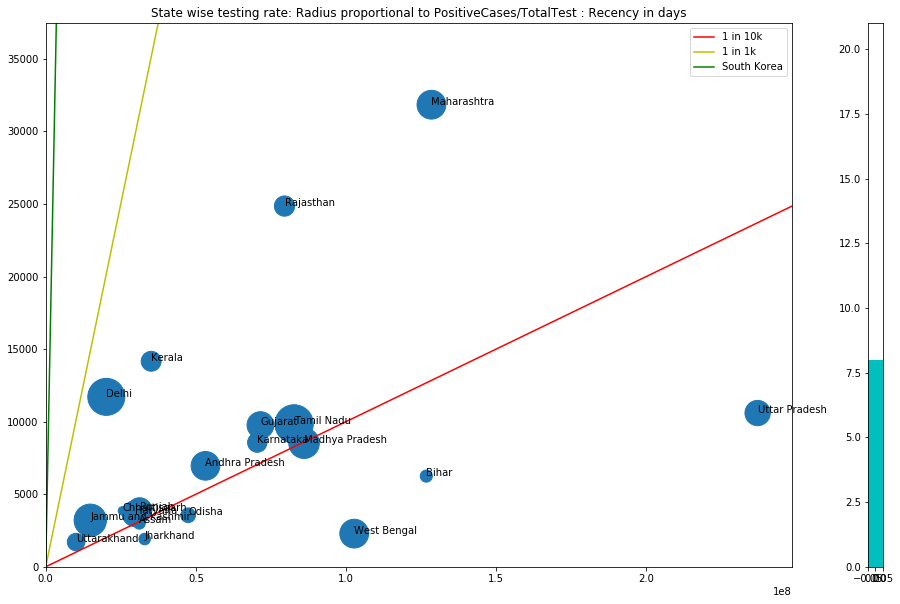

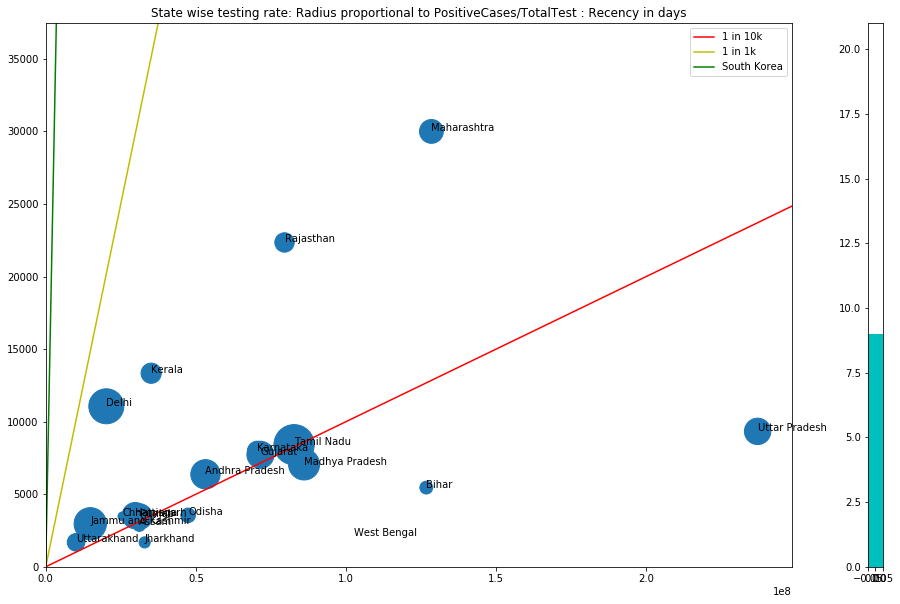

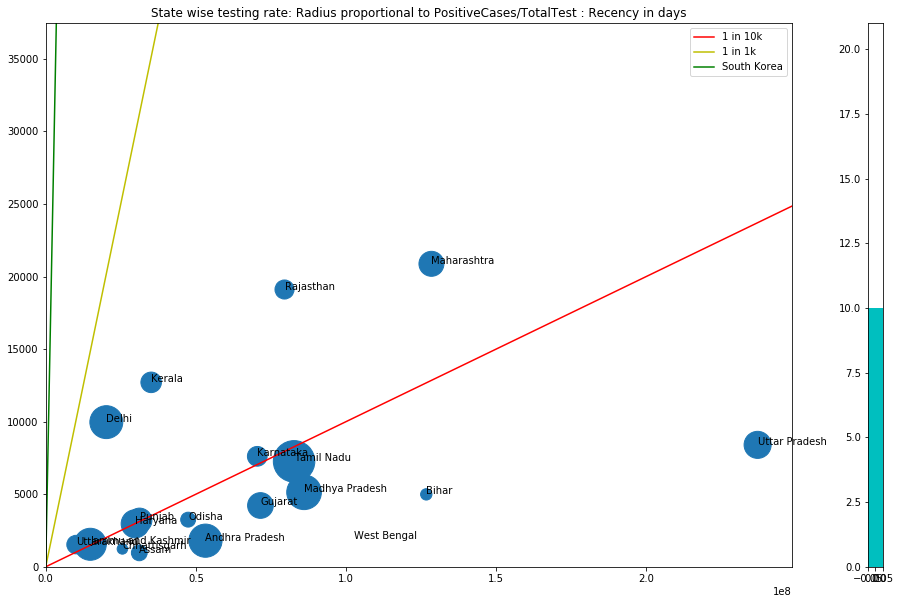

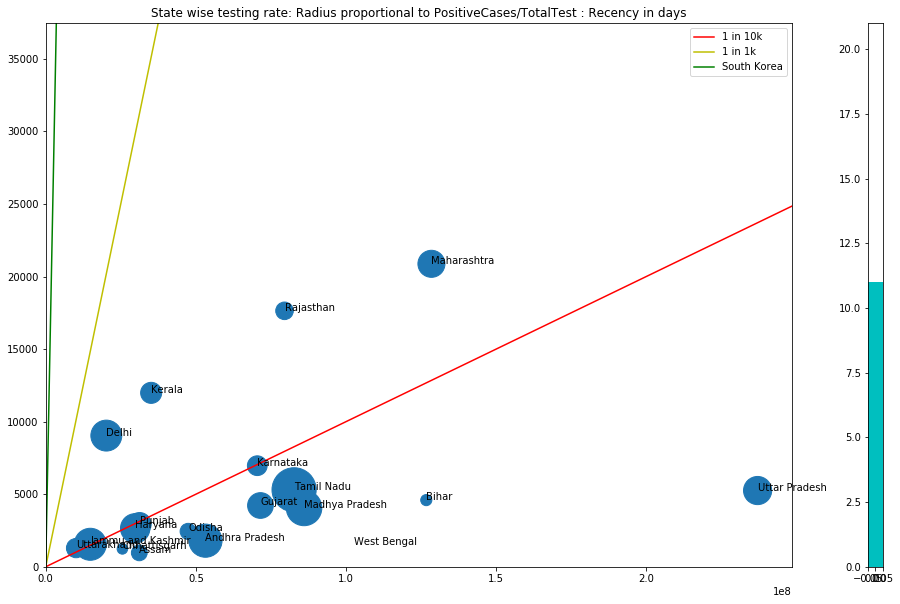

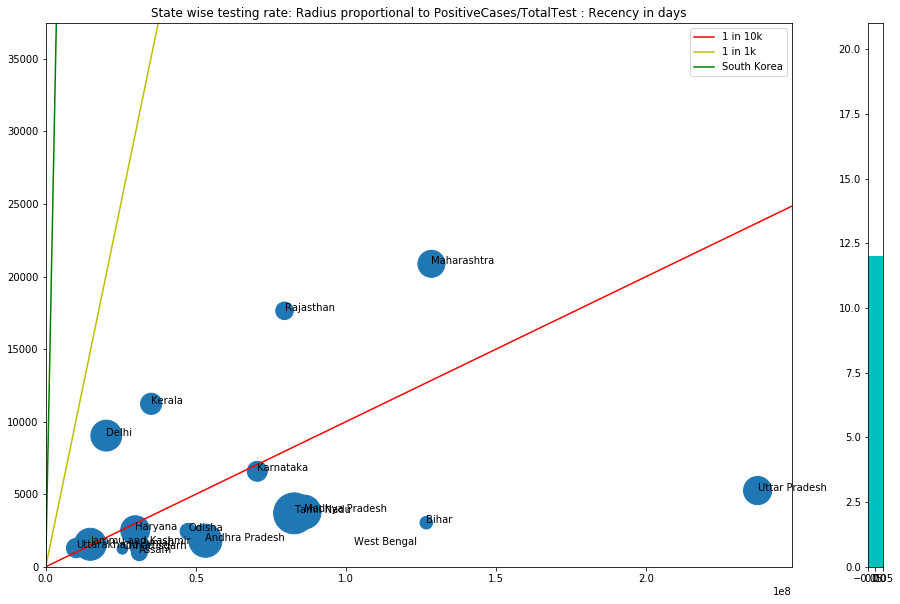

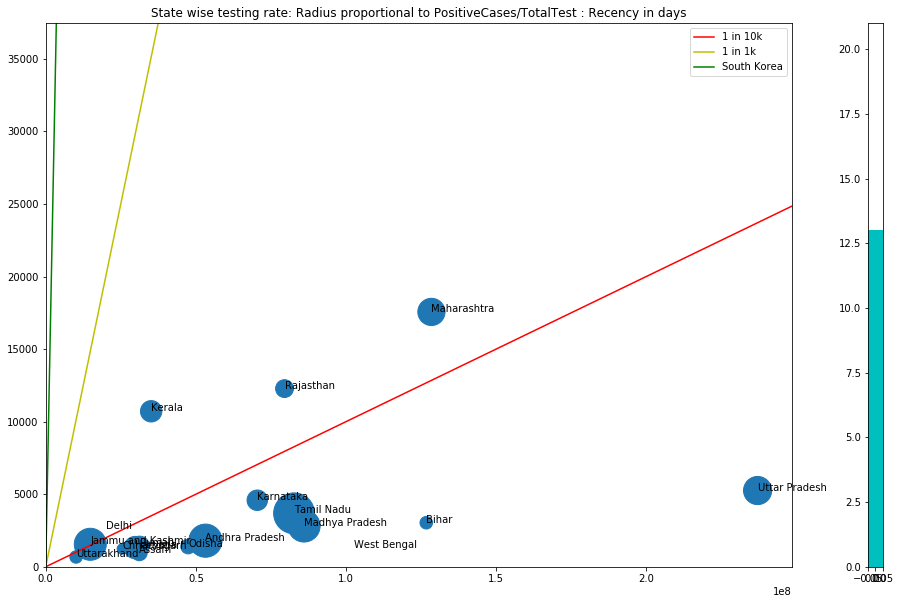

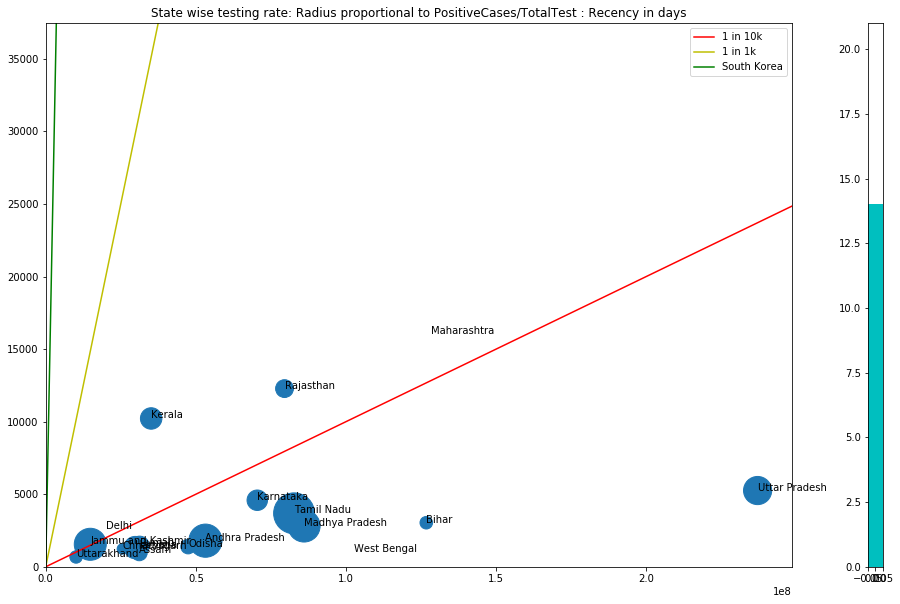

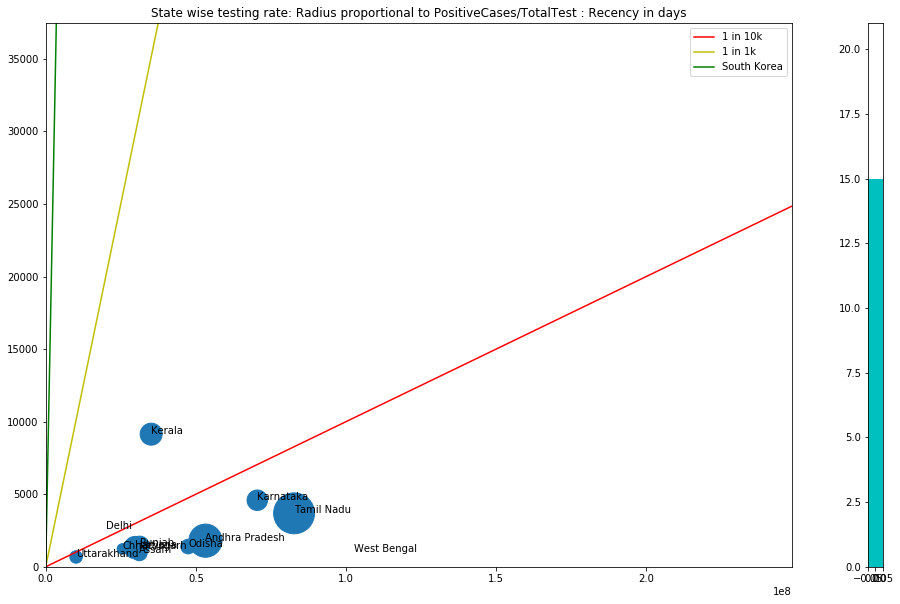

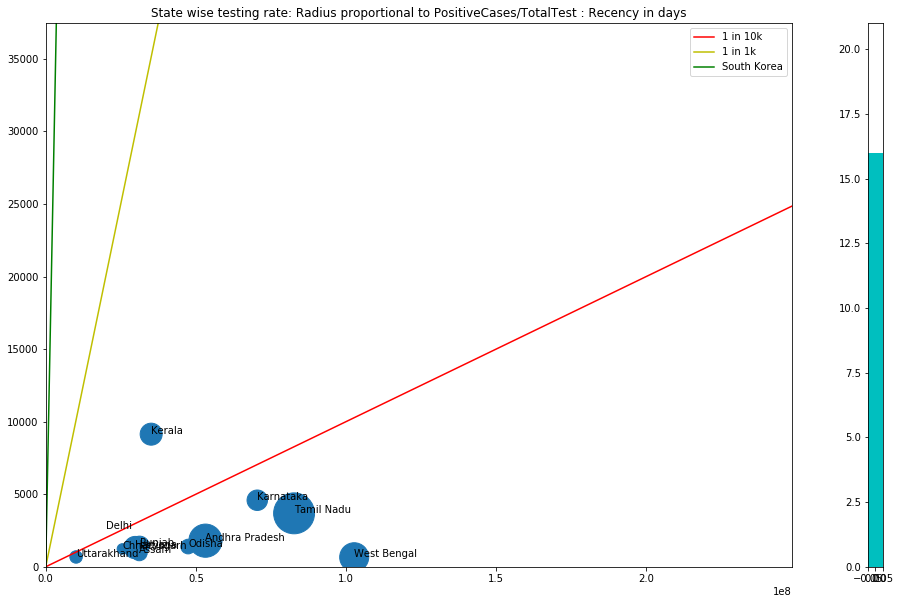

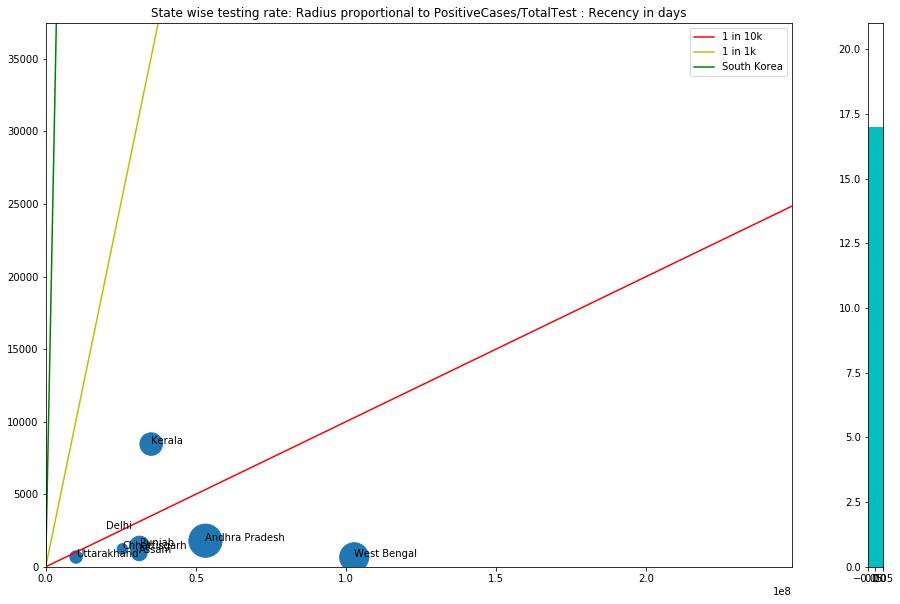

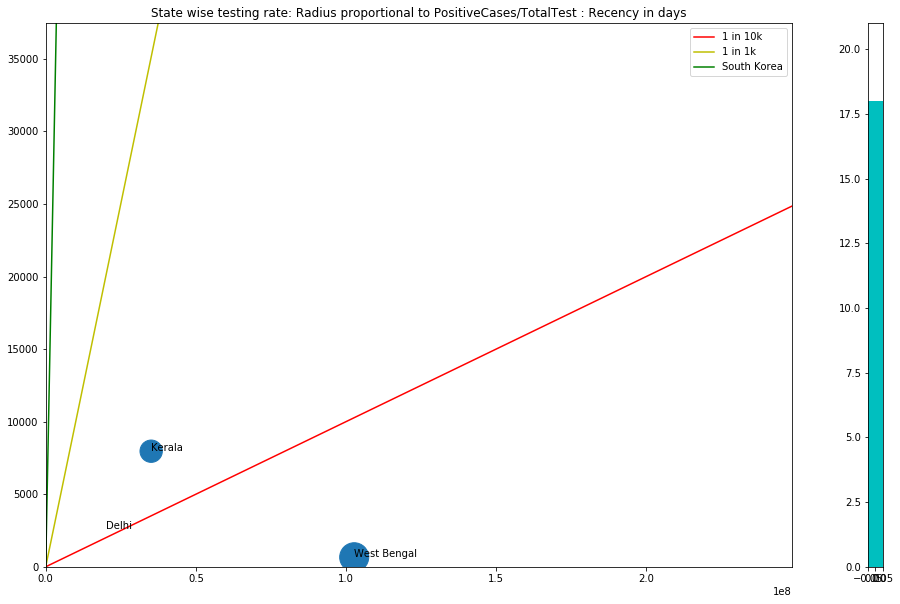

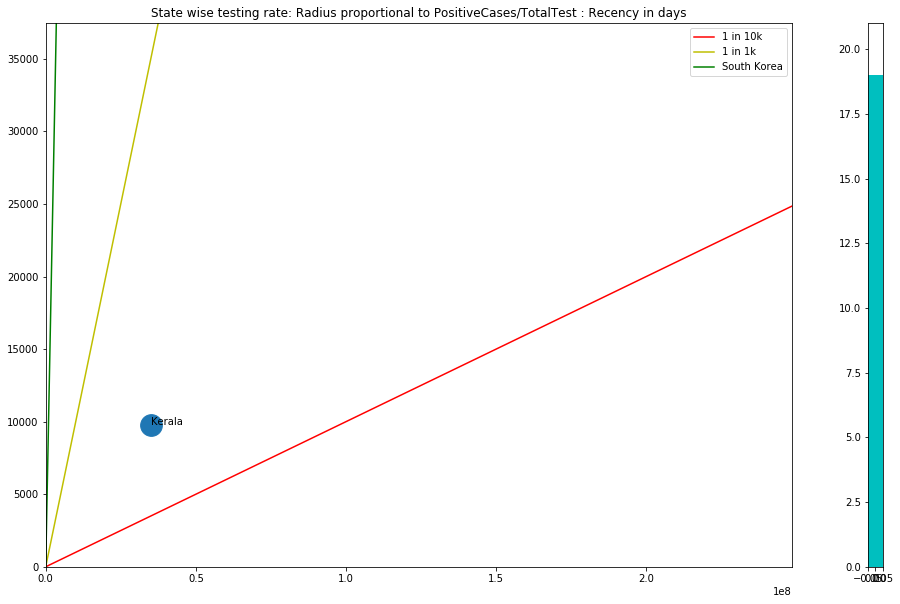

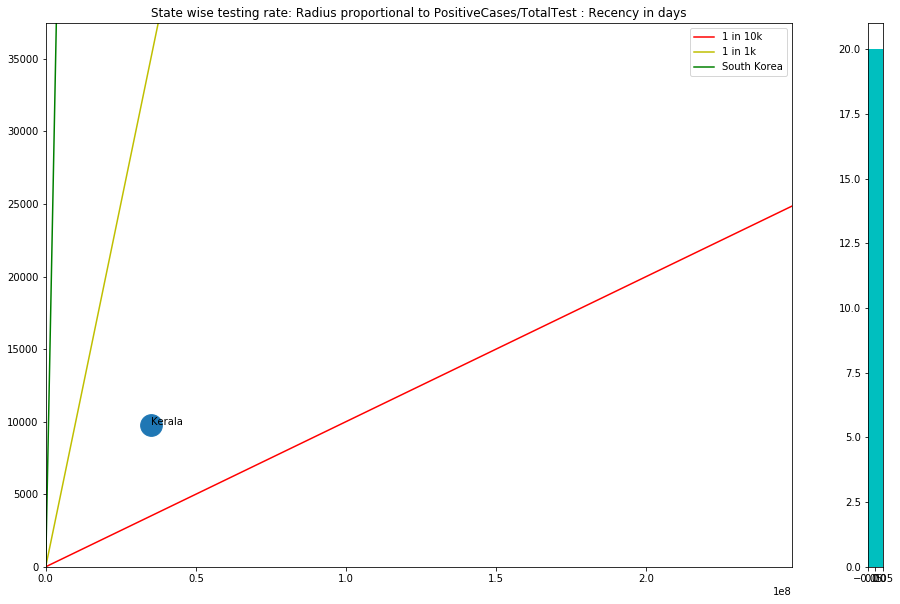

In [169]:
for di in range(len(all_days)):
# di = 10
    
    chart_df1 = chart_df[chart_df.Population>=8000000][chart_df['Recency']<=di*(-1)].drop_duplicates('State',keep='last')

    f, (ax, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [50, 1]},figsize=(15,10))
    y = chart_df1['Total Tested'].values
    x = chart_df1["Population"].values
    n = chart_df1['State'].values
    s = chart_df1['positive_rate'].values
    # ax,a1
    # ax = plt.gca()

    # fig, ax = plt.subplots()
    ax.scatter(x, y,s=s)
    # plt.gcf().set_size_inches((15, 10))  
    ax.set_ylim([0, 37457])
    ax.set_xlim([0, 248443937])

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))

    slope = 1/10000
    c = 0

    x_min, x_max = ax.get_xlim()
    y_min, y_max = x_min*slope, x_max*slope
    ax.plot([x_min, x_max], [y_min, y_max],c='r', label='1 in 10k')
    ax.set_xlim([0, x_max])

    slope = 10/10000
    c = 0

    y_min, y_max = ax.get_ylim()
    x_min, x_max = y_min/slope, y_max/slope
    ax.plot([x_min, x_max], [y_min, y_max],c='y', label='1 in 1k')
    ax.set_ylim([0, y_max])

    slope = 546463/51600000
    c = 0

    y_min, y_max = ax.get_ylim()
    x_min, x_max = y_min/slope, y_max/slope
    ax.plot([x_min, x_max], [y_min, y_max],c='g', label='South Korea')
    ax.set_ylim([0, y_max])
    ax.legend()
    a1.bar([0],[di],color=['c'])
    a1.set_xlim([0,0])
    a1.set_ylim([0, len(all_days)])
    ax.set_title('State wise testing rate: Radius proportional to PositiveCases/TotalTest : Recency in days')
    plt.savefig('CovidIndiaAnalysis_Source_covid19india_org'+str(di)+'.jpeg')

In [173]:
imageio.mimsave?

In [170]:
import imageio
images = []
filenames = ['CovidIndiaAnalysis_Source_covid19india_org'+str(di)+'.jpeg' for di in range(len(all_days))]
for filename in filenames[::-1]:
    images.append(imageio.imread(filename))
imageio.mimsave('covid.gif', images)

<Figure size 360x360 with 0 Axes>

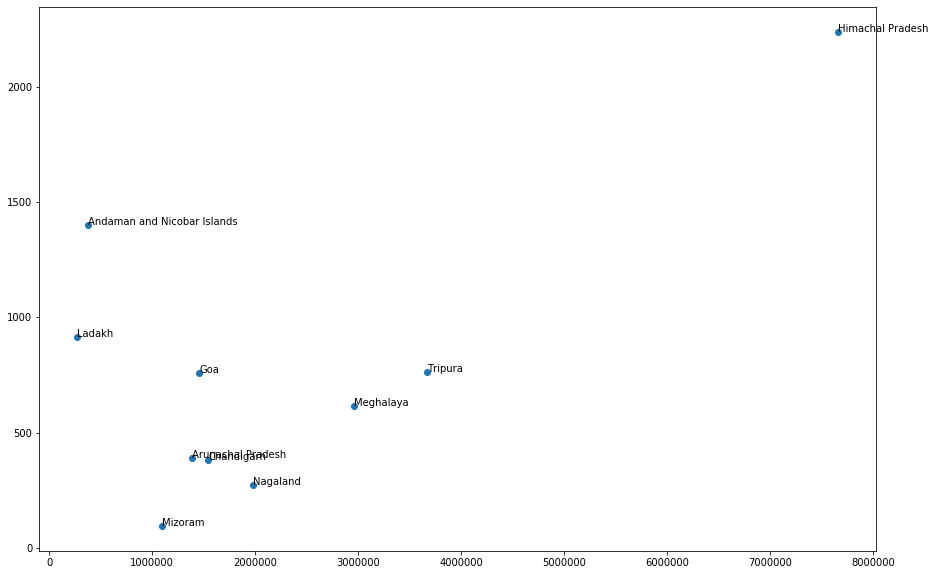

In [77]:
chart_df2 = chart_df[chart_df.Population<=10000000]
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
y = chart_df2['Total Tested'].values
x = chart_df2["Population"].values
n = chart_df2['State'].values

fig, ax = plt.subplots()
plt.scatter(x, y)
plt.gcf().set_size_inches((15, 10))  

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))